In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#read data
data = pd.read_csv("Job titles and industries.csv")

In [4]:
data.describe()

,job title,industry
count,8586,8586
unique,3890,4
top,marketing executive,IT
freq,91,4746


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8586 entries, 0 to 8585
Data columns (total 2 columns):
job title    8586 non-null object
industry     8586 non-null object
dtypes: object(2)
memory usage: 134.2+ KB


In [6]:
data.head()

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


<h3>this in only 3890 unique data so there's a lot of duplicate data </h3>

In [7]:
data.drop_duplicates(inplace=True)

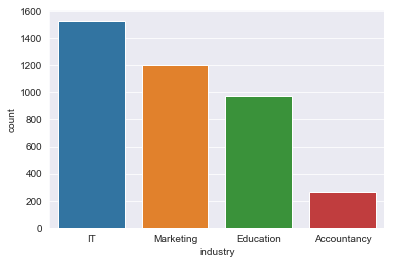

In [8]:
sns.set_style("darkgrid")
sns.countplot(x="industry",data=data)

In [9]:
data["length of text"] = data["job title"].apply(len)

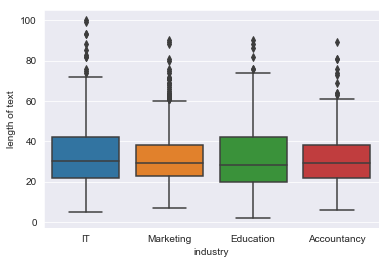

In [10]:
sns.boxplot(x="industry",y="length of text",data=data)

<h3>As shown in the figure above the length of the text can't separate between labels hence all have almost similar distribution.</h3>

In [11]:
#drop column that has been created 
data.drop("length of text",axis=1,inplace =True)

In [12]:
data.head()

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


In [13]:
#shuffle data
data = data.sample(frac=1).reset_index()

In [14]:
data.head()

,index,job title,industry
0,204,sales development representative - £32k ote,IT
1,4934,content and social manager,Marketing
2,6820,eyfs-ks2 ppa teacher - brent,Education
3,7242,accounts payable clerk - sw london - asap,Accountancy
4,6479,teacher of mfl french and spanish,Education


In [15]:
data.drop("index",axis=1,inplace=True)

In [16]:
data.head()

,job title,industry
0,sales development representative - £32k ote,IT
1,content and social manager,Marketing
2,eyfs-ks2 ppa teacher - brent,Education
3,accounts payable clerk - sw london - asap,Accountancy
4,teacher of mfl french and spanish,Education


In [17]:
import string
from nltk.corpus import stopwords

In [18]:
def cleanText(text):
    """
    this function is used to remove any unnecessary words info in text
    it takes text as input
    remove punctuation and non useful words like it,has,is etc.
    """
    unpunc = "".join([char for char in text if char not in string.punctuation])
    return [word for word in unpunc.split() if word.lower() not in stopwords.words("english")]

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [20]:
#split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(data["job title"], data["industry"], test_size=0.33, random_state=42)

In [21]:
'''
create pip line that take corpus count number of word in it.
make sparse matrix which make every sentance is vector that have ones in front of the words have been in the sentance and zero 
if the word is not exist.
Than used term frequency-inverse document frequency(TFIDF) to show the importance of term before fit it into model.
then fit it into model(classifier).
'''
piplineNaive = Pipeline([
    ("count vector", CountVectorizer(analyzer=cleanText)),
    ("tfidf", TfidfTransformer()),
    ("classifier", MultinomialNB())
])

In [22]:
piplineNaive.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('count vector', CountVectorizer(analyzer=<function cleanText at 0x000002EC8D5670D0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), prepr...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [23]:
prdictions = piplineNaive.predict(X_test)

In [24]:
print(classification_report(y_test,prdictions))

              precision    recall  f1-score   support

 Accountancy       0.97      0.38      0.55        97
   Education       0.92      0.84      0.88       311
          IT       0.84      0.93      0.88       495
   Marketing       0.82      0.88      0.85       407

   micro avg       0.85      0.85      0.85      1310
   macro avg       0.89      0.76      0.79      1310
weighted avg       0.86      0.85      0.85      1310



# create another model with random forest instead of naive bayes

In [25]:
piplineEnsamble= Pipeline([
    ("count vector", CountVectorizer(analyzer=cleanText)),
    ("tfidf", TfidfTransformer()),
    ("classifier", RandomForestClassifier(n_estimators=300))
])

In [26]:
piplineEnsamble.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('count vector', CountVectorizer(analyzer=<function cleanText at 0x000002EC8D5670D0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), prepr...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [27]:
prdictions = piplineEnsamble.predict(X_test)

In [28]:
print(classification_report(y_test,prdictions))

              precision    recall  f1-score   support

 Accountancy       0.89      0.72      0.80        97
   Education       0.85      0.84      0.85       311
          IT       0.84      0.89      0.87       495
   Marketing       0.83      0.81      0.82       407

   micro avg       0.84      0.84      0.84      1310
   macro avg       0.85      0.82      0.83      1310
weighted avg       0.84      0.84      0.84      1310



<h3> Even naive bayes is best with text but I tried Random Forset because  from my experience it gives best result over other classification algorithms </h3> 

In [29]:
import pickle

In [30]:
# to save model to used again 
pickle.dump(piplineNaive,open("naive classifier.pickle",'wb'),-1)

In [31]:
pickle.dump(piplineEnsamble,open("ensumble classifier.pickle",'wb'))